<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Load" data-toc-modified-id="Data-Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Load</a></span></li><li><span><a href="#Vanilla-Backpropagation" data-toc-modified-id="Vanilla-Backpropagation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Vanilla Backpropagation</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>CIFAR10</a></span></li></ul></li><li><span><a href="#Vanilla-Backpropagation-+-SmoothGrad" data-toc-modified-id="Vanilla-Backpropagation-+-SmoothGrad-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Vanilla Backpropagation + SmoothGrad</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CIFAR10</a></span></li></ul></li></ul></div>

In [1]:
import torch

import numpy as np
import sys

import matplotlib.pyplot as plt

sys.path.append('../code')
from utils import get_example_params, rescale_image
from vanilla_backprop import VanillaBackprop
from smoothgrad import generate_smooth_grad

# Data Load

In [2]:
original_images_mnist, pre_images_mnist, mnist_classes, mnist_model = get_example_params('mnist')

Data Complete
Model Complete


In [3]:
original_images_cifar10, pre_images_cifar10, cifar10_classes, cifar10_model = get_example_params('cifar10')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Data Complete
Model Complete


# Vanilla Backpropagation

## MNIST

In [4]:
mnist_VBP = VanillaBackprop(mnist_model)

In [5]:
nb_class = 10
outputs = np.zeros(original_images_mnist.shape, dtype=np.float32)
probs = np.zeros(nb_class)
preds = np.zeros(nb_class)

for i in range(nb_class):
    img = pre_images_mnist[i].unsqueeze(0)
    output, prob, pred = mnist_VBP.generate_image(img, 0, i)
    outputs[i] = output
    probs[i] = prob
    preds[i] = pred

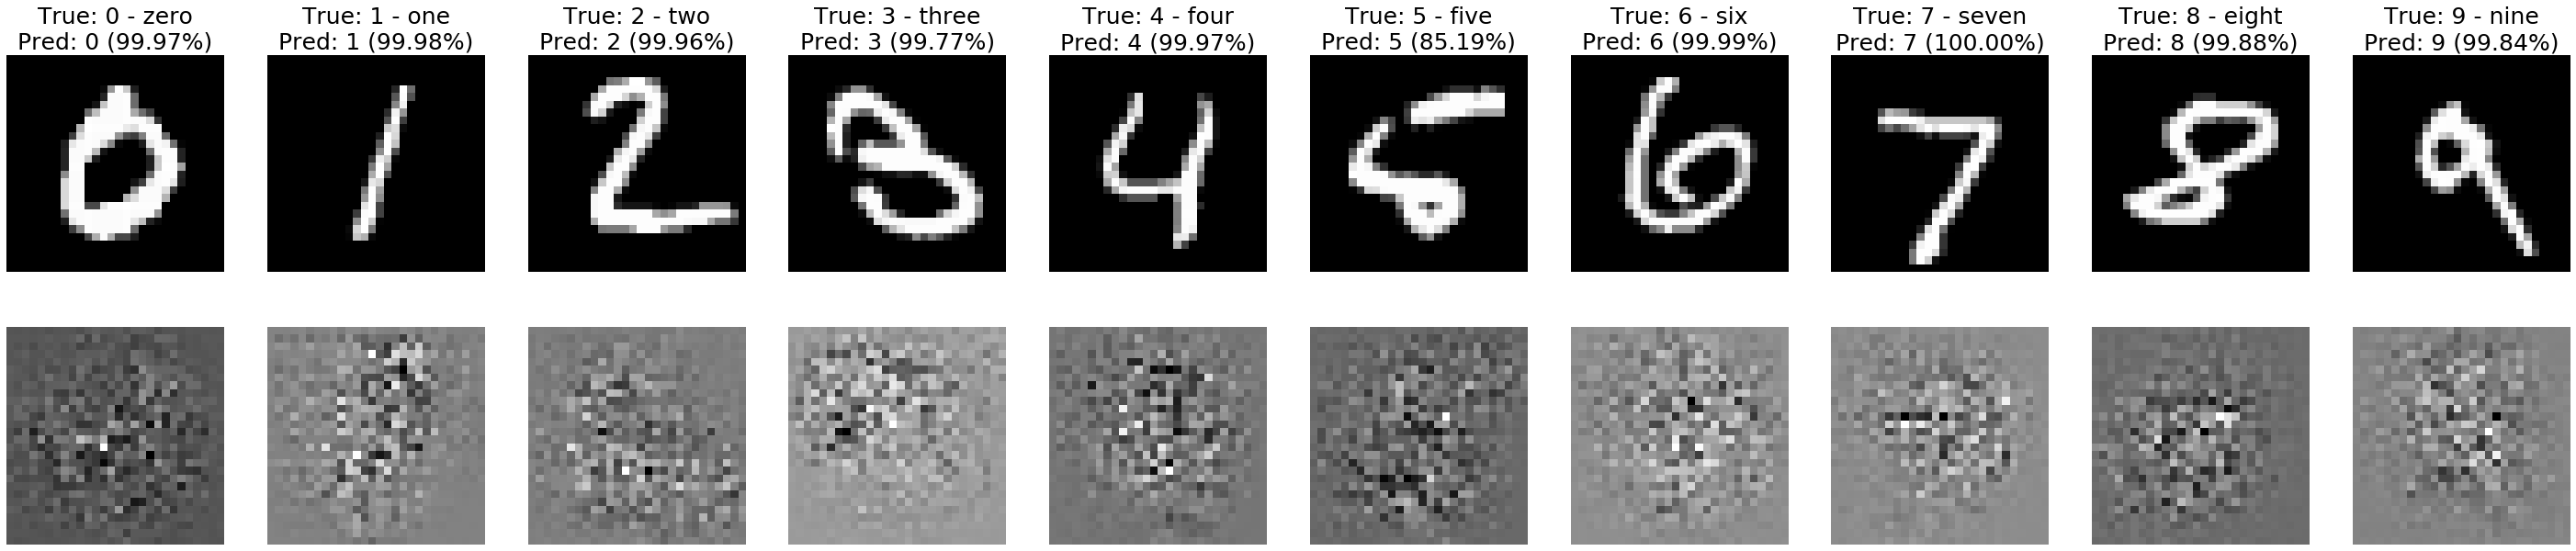

In [6]:
f, ax = plt.subplots(2,10,figsize=(50,10))
for i in range(10):
    ax[0,i].imshow(original_images_mnist[i].squeeze(), 'gray')
    ax[1,i].imshow(outputs[i].squeeze(), 'gray')
    
    ax[0,i].set_title('True: {0:}\nPred: {1:} ({2:.2%})'.format(mnist_classes[i], int(preds[i]), probs[i]), size=25)
    ax[0,i].axis('off')
    ax[1,i].axis('off')

## CIFAR10

In [7]:
cifar10_VBP = VanillaBackprop(cifar10_model)

In [8]:
nb_class = 10
outputs = np.zeros(original_images_cifar10.shape, dtype=np.float32)
probs = np.zeros(nb_class)
preds = np.zeros(nb_class)

for i in range(nb_class):
    img = pre_images_cifar10[i].unsqueeze(0)
    output, prob, pred = cifar10_VBP.generate_image(img, 0, i)
    outputs[i] = output
    probs[i] = prob
    preds[i] = pred

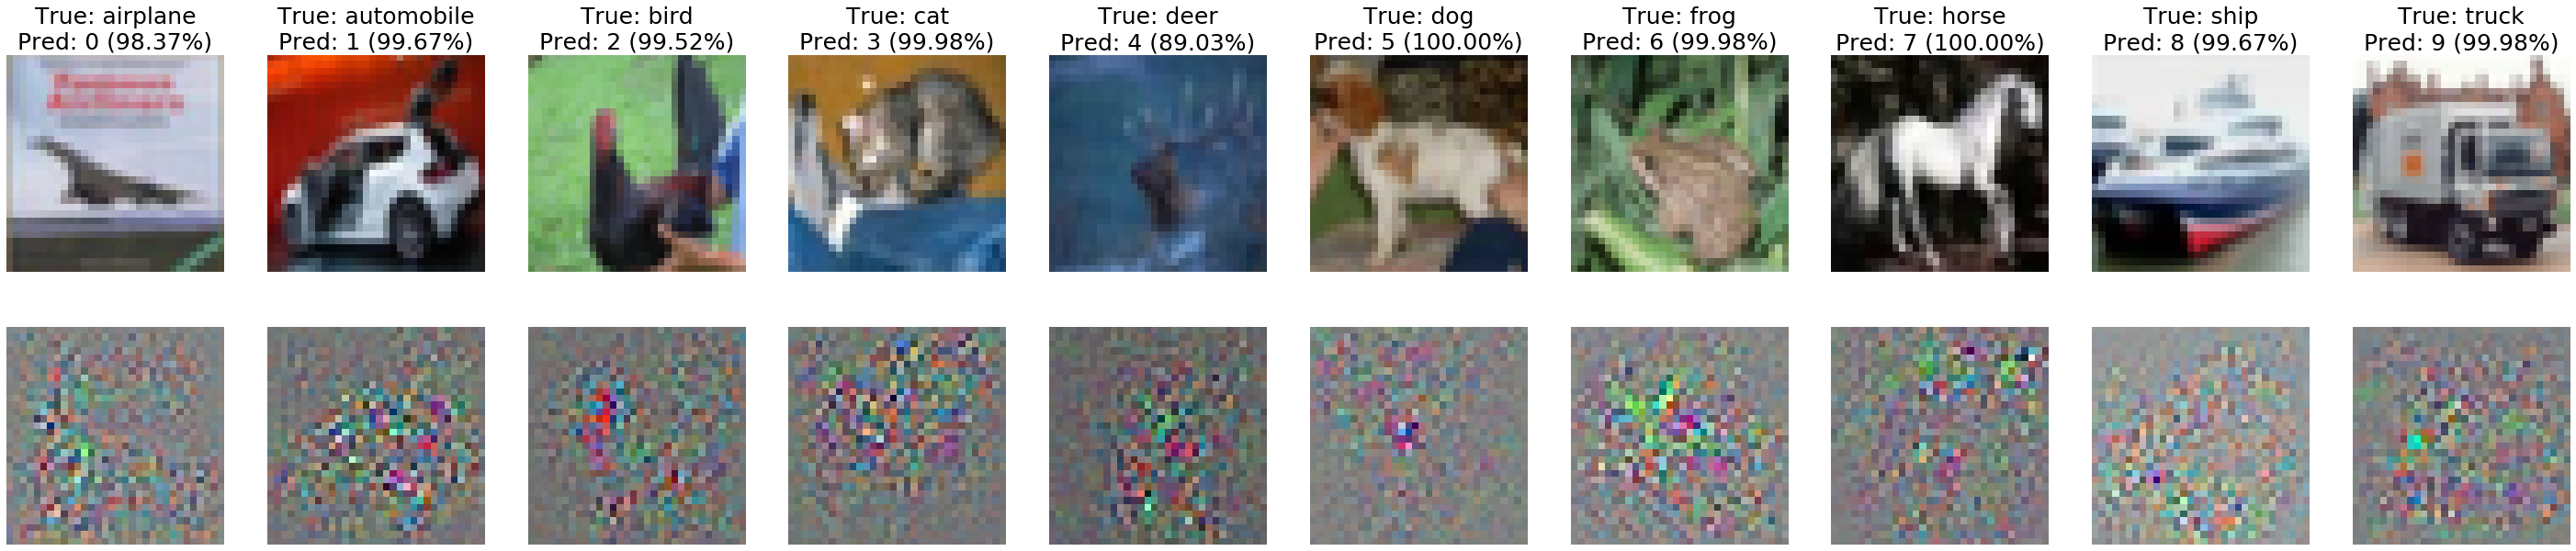

In [9]:
f, ax = plt.subplots(2,10,figsize=(50,10))
for i in range(10):
    ax[0,i].imshow(original_images_cifar10[i])
    ax[1,i].imshow(outputs[i])
    
    ax[0,i].set_title('True: {0:}\nPred: {1:} ({2:.2%})'.format(cifar10_classes[i], int(preds[i]), probs[i]), size=25)
    ax[0,i].axis('off')
    ax[1,i].axis('off')

# Vanilla Backpropagation + SmoothGrad

## MNIST

In [10]:
mnist_VBP = VanillaBackprop(mnist_model)

In [11]:
nb_class = 10
outputs = np.zeros(original_images_mnist.shape, dtype=np.float32)
probs = np.zeros(nb_class)
preds = np.zeros(nb_class)

n = 50
sigma = 2
output_size = (28,28,1)

for i in range(nb_class):
    img = pre_images_mnist[i].unsqueeze(0)
    output, prob, pred = generate_smooth_grad(img, output_size, n, sigma, 0, mnist_VBP, i)
    outputs[i] = output
    probs[i] = prob
    preds[i] = pred

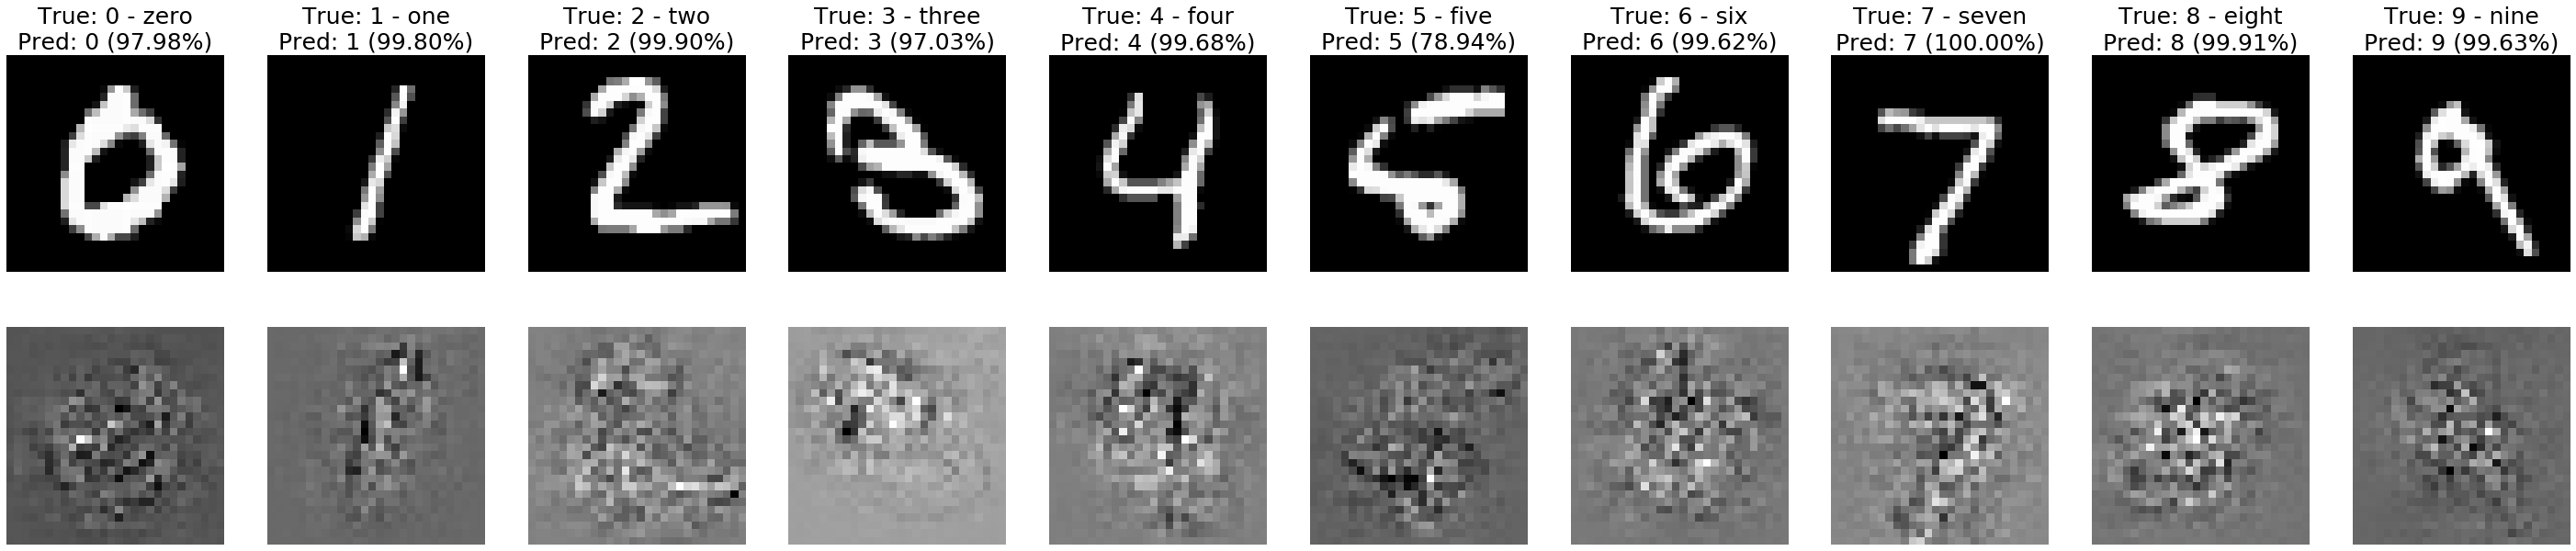

In [12]:
f, ax = plt.subplots(2,10,figsize=(50,10))
for i in range(10):
    ax[0,i].imshow(original_images_mnist[i].squeeze(), 'gray')
    ax[1,i].imshow(outputs[i].squeeze(), 'gray')
    
    ax[0,i].set_title('True: {0:}\nPred: {1:} ({2:.2%})'.format(mnist_classes[i], int(preds[i]), probs[i]), size=25)
    ax[0,i].axis('off')
    ax[1,i].axis('off')

## CIFAR10

In [13]:
cifar10_VBP = VanillaBackprop(cifar10_model)

In [14]:
nb_class = 10
outputs = np.zeros(original_images_cifar10.shape, dtype=np.float32)
probs = np.zeros(nb_class)
preds = np.zeros(nb_class)

n = 50
sigma = 2
output_size = (32,32,1)

for i in range(nb_class):
    img = pre_images_cifar10[i].unsqueeze(0)
    output, prob, pred = generate_smooth_grad(img, output_size, n, sigma, 0, cifar10_VBP, i)
    outputs[i] = output
    probs[i] = prob
    preds[i] = pred

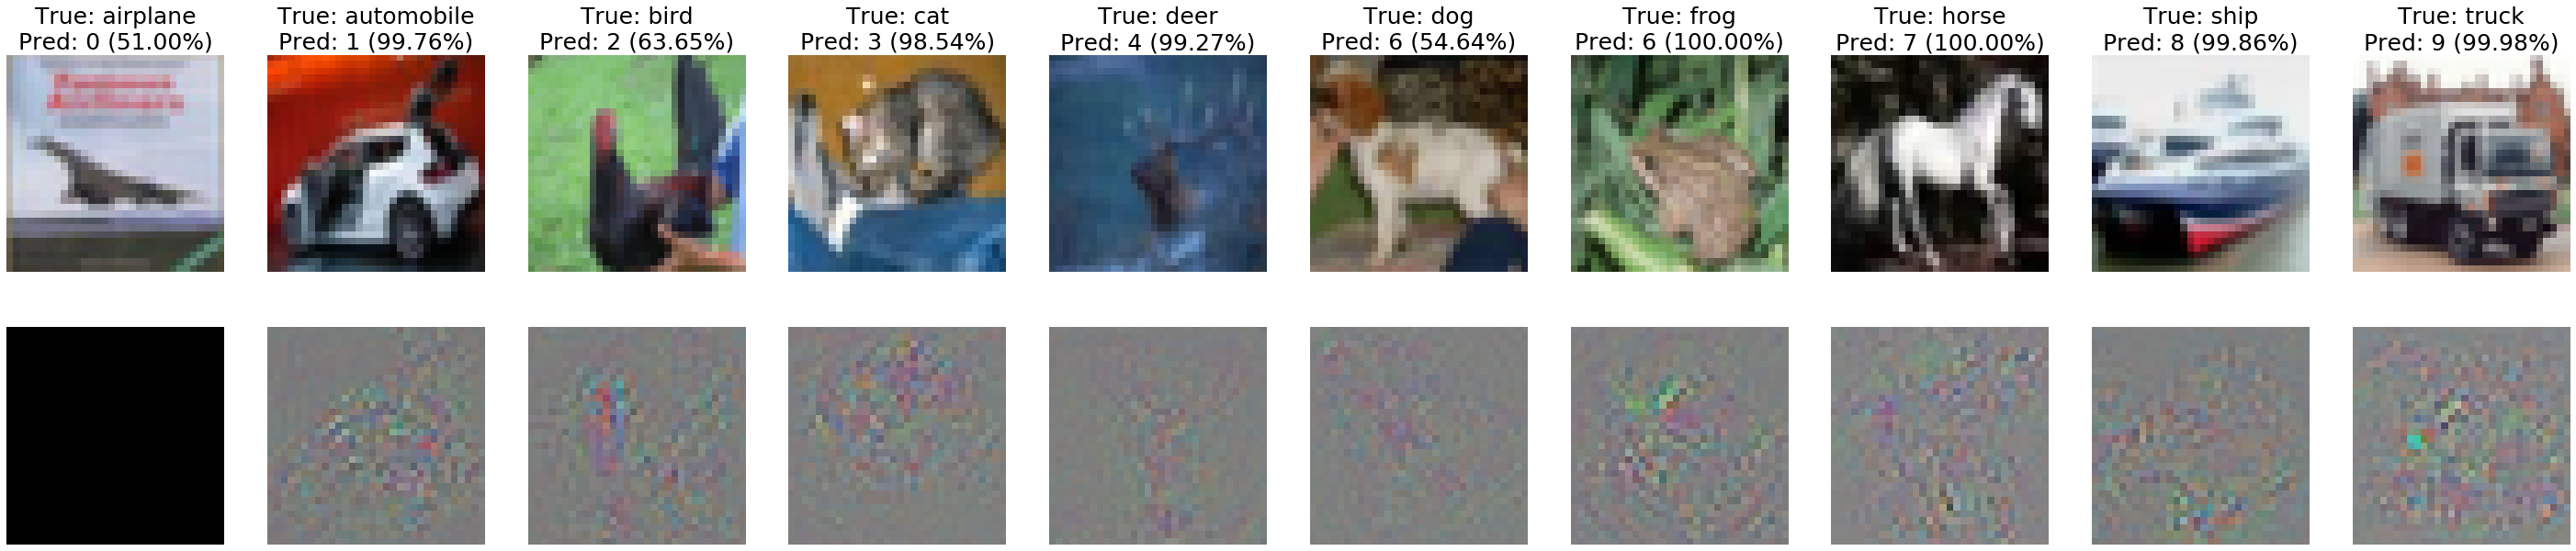

In [15]:
f, ax = plt.subplots(2,10,figsize=(50,10))
for i in range(10):
    ax[0,i].imshow(original_images_cifar10[i])
    ax[1,i].imshow(outputs[i])
    
    ax[0,i].set_title('True: {0:}\nPred: {1:} ({2:.2%})'.format(cifar10_classes[i], int(preds[i]), probs[i]), size=25)
    ax[0,i].axis('off')
    ax[1,i].axis('off')